In [1]:
''' Classes and functions used throughout the notebook. '''
from IPython.display import HTML, IFrame, Image, display
import re

# default height and width gloabl variables
H=300
W=H*1.7778

class DisplayVideo(IFrame):
    ''' Display a video into a Jupyter Notebook.'''

    def __init__(self, video_link, width=500, height=285,
                 cc=1, showinfo=0, rel=0, controls=0,
                 **kwargs):
        self.sites = {'youtube.com': 'https://www.youtube.com/embed/{}',
                      'youtu.be': 'https://www.youtube.com/embed/{}',
                      'vimeo.com': 'https://player.vimeo.com/video/{}',
                      'dailymotion.com': 'https://www.dailymotion.com/embed/video/{}'}
        self.video_link = video_link
        src = self._construct_src()
        super().__init__(src, width, height, cc_load_policy=cc,
                         showinfo=showinfo, rel=rel,
                         controls=controls, **kwargs)

    def _construct_src(self):
        unwanted_substrings = 'http.*://|www.|watch\?v\=|video\/'
        link = re.sub(unwanted_substrings, '', self.video_link)
        website, video = link.split('/')
        src = self.sites[website].format(video)
        return src
    
    

In [6]:
import warnings
warnings.filterwarnings("ignore")

# Introduction to Machine Learning

## General Definitions

**Features**; Input - column(s) of data used to predict a label e.g. manufacteurer, top_speed, engine_type

**Label (AKA Target)**; Output - something a set of features are meant to predict  e.g. car_model_name

**Variance (stats)**; spread of data distibution e.g. a large variance falls over a large numerical range of values

**Target Function**; The correct labels the model is trying to predict.

**Maximal Variance**; The line which produces the maximum aount of variance/distance between data points and the line. This minimises the total information loss between the daat and the line.

**Discrete**; Individually seperate, non-ordered and distinct like categories/classifications e.g. slow/fast, phone numbers

**Continuous**; Not restricted to defined seperate values but rather something that is ordered like numeric e.g. weight, income

**Unsupervised Learning**; 

**Generalization**; How well the training data learned by a machine learning model apply to specific data not seen by the model when it was learning.

**Overfitting**; A modeling error which occurs when a function is too closely fit to a limited set of data points. 

**Underfitting**; Occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data. 

classifier

**Weak Classifier**; A classifier which only labels data better than random guessing

**Bootsrap Aggregating (AKA Bagging)**; The combination of learning models to increase the classification accuracy, reduced variance and decreased overfitting


## Parametric Vs Nonparametic
*"Learners can be divided into two major types: those whose representation has a fixed size (parametric), like linear classifiers, and those whose representation can grow with the data (nonparametric), like decision trees. (The latter are sometimes called non-parametric learners, but this is somewhat unfortunate, since they usually wind up learning many more parameters than parametric ones.)" P. Domingos*

Paremetric models assume some finite set of parameters while Nonparametric models assume the data distribution cannot be defined in terms of such a finite set of parameters.

### Parametric Algorithms
Some more examples of parametric machine learning algorithms include:
- Logistic Regression
- Linear Discriminant Analysis
- Perceptron
- Naive Bayes
- Simple Neural Networks

Benefits of Parametric Machine Learning Algorithms:

- Simpler: These methods are easier to understand and interpret results.
- Speed: Parametric models are very fast to learn from data.
- Less Data: They do not require as much training data and can work well even if the fit to the data is not perfect.

Limitations of Parametric Machine Learning Algorithms:

- Constrained: By choosing a functional form these methods are highly constrained to the specified form.
- Limited Complexity: The methods are more suited to simpler problems.
- Poor Fit: In practice the methods are unlikely to match the underlying mapping function.

### Nonparametric Algorithms
Some more examples of popular nonparametric machine learning algorithms are:

- k-Nearest Neighbors
- Decision Trees like CART and C4.5
- Support Vector Machines

Benefits of Nonparametric Machine Learning Algorithms:

- Flexibility: Capable of fitting a large number of functional forms.
- Power: No assumptions (or weak assumptions) about the underlying function.
- Performance: Can result in higher performance models for prediction.

Limitations of Nonparametric Machine Learning Algorithms:

- More data: Require a lot more training data to estimate the mapping function.
- Slower: A lot slower to train as they often have far more parameters to train.
- Overfitting: More of a risk to overfit the training data and it is harder to explain why specific predictions are made.


## **Overfitting Vs. Underfitting**

**[Overfitting](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)** is a modeling error which occurs when a model too closely fits the training data such that it cannot distinguish between the noise and the signal. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model.The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize. Applying the model to new data will therefore result in poor prediction (low acurracy score). 

An overfit model is said to have **High Variance**. This can be described as a model that fits each data point in the training set so well that it does not generalise to new data. This is usually caused by using too many features in your model. You will usually find a far higher accuracy score on the training data compared to the test data.

**Underfitting** refers to a model that can neither model the training data nor generalize to new data. An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.

An underfit model is said to have **High Bias**. This can be described as an over-simplified model that makes too many assumptions about the data. It's predictions do not imporove no matter how much you train it or extra data you add. This usually caused by using too little features in your model. A high error on the training set is a clear way to identify underfitting.

### Summary
Overfit 
- High Variance. 
- Usually caused by using too many features.
- High error on test set, good fit on training data.
- A simple way to detect this effect in practice is by **cross-validation**.
- Resolved by decreasing number of features or tuning model parameters.


Underfit 
- High Bias; oversimplified algorithm that makes too many assumptions about the data.
- High error on training set.
- Resolved by adding more features or tuning model parameters.


You want to have enough features to fit your data in an accurate way (adequated variance) but with the minimum number of features thats needed to do that (adequate bias).





### Overfitting Examples
The below image shows two lines; a straight line and a wavy line. The former represents a very well fit model while the latter represents an overfit model. 

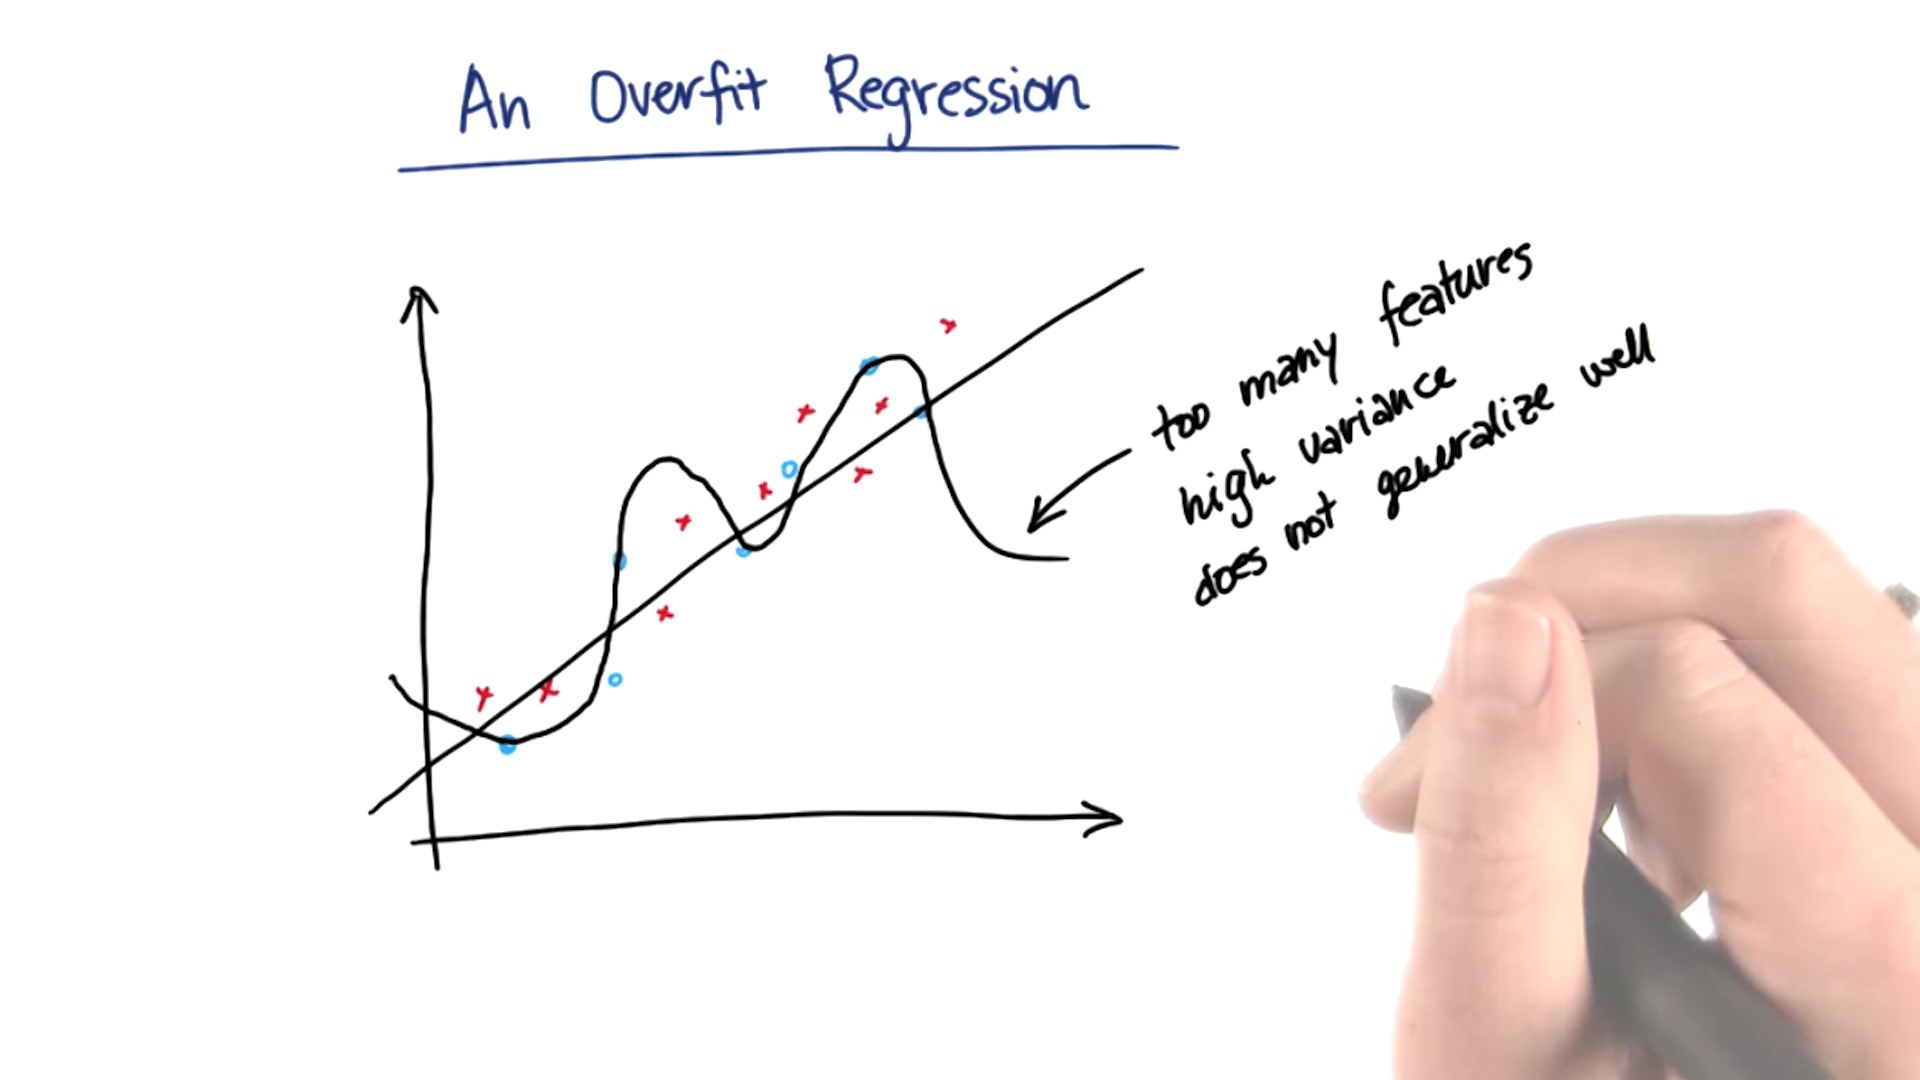

In [3]:
Image('./images/OverfitRegression.png', 
        height=H, width=W)

### Bias-Variance Tradeoff
The below video demonstrates how arrive at the best fit by balancing bias and variance:

In [3]:
DisplayVideo('https://youtu.be/IwiIFMcDwoA', end=48)

## **Validation**
We perform validation to:
- Estimate the performance of on an independant dataset.
- Check for over-fitting.

### Holdout
Holdout Set; We hold back some subset of the data from the training of the model, and then use this holdout set to check the model performance. This can  done using the ```train_test_split``` utility: 

In [315]:
from sklearn.metrics import accuracy_score
from sklearn import neighbors

def test_CV_method(X_train, X_test, y_train, y_test):
    ''' Get accuracy score from KN classifier.'''
    clf = neighbors.KNeighborsClassifier(n_neighbors=4, weights='distance')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [405]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn import svm


# split the data into labels and features
iris = load_iris()
X = iris.data
y = iris.target

# split further into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

# choose classifier and traing it
# clf = neighbors.KNeighborsClassifier(n_neighbors=4, weights='distance', 
#                                      algorithm = 'brute')
svm_model = svm.SVC(kernel='linear', C=1, gamma='auto')
clf.fit(X_train, y_train)

# get accuracy score (will change each time you execute, between 92-97%)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

training_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

msg = 'Accuracy: {}\nTraining: {}\nTesting: {}'.format(acc, training_score, 
                                                       test_score)
print(msg)

Accuracy: 0.9333333333333333
Training: 1.0
Testing: 0.9333333333333333


One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training. In the above case, half the dataset does not contribute to the training of the model.

### K-Fold Cross Validation
1. Split the data into a number of subsets/folds (k) (one k is kept for testing?).
2. Use each k to train an algorithm.
3. Test each trained k. 
4. Average all the test results. 

**Warning**: One caveat of KFold is that it will not shuffle any of the labels and features so it will be split into ordered partitions. This can be problematic if, for example, the first half of the DataFrames labels are '0' and the second half are '1'.

This can be fixed by setting ``shuffle=True`` when initialising ```KFold```.

```StratifiedKFold``` and ```StratifiedShuffleSplit``` are KFold variants. The difference between them are discussed [here]('https://stackoverflow.com/questions/37635460/stratifiedkfold-vs-stratifiedshufflesplit-vs-stratifiedkfold-shuffle')


In [29]:
DisplayVideo('https://youtu.be/TIgfjmp-4BA', end=133)

In [310]:
from sklearn.model_selection import StratifiedShuffleSplit, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=5)

scores = []
# perform the 
for train_index, test_index in CV_method.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = neighbors.KNeighborsClassifier(n_neighbors=4, weights='distance')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# seems to change everytime I execute...
np.array(scores).mean()

0.93333333333333335

### Cross_Val_Score

Writing the above code everytime is tedious so one can use ```cross_val_score``` instead. When the cv argument is an integer, cross_val_score uses the KFold or StratifiedKFold strategies by default, the latter being used if the estimator derives from ClassifierMixin.

In [265]:
from sklearn.cross_validation import cross_val_score
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=4, weights='distance')
cv_scores = cross_val_score(clf, X, y, cv=5)
cv_scores.mean()

0.96666666666666679

Other cross validation strategies can also be used with cross_val_score by parsing it to the cv argument.

In [377]:
from sklearn.model_selection import ShuffleSplit
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=4, weights='distance')
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cv_scores = cross_val_score(clf, X, y, cv=cv.split(X))
cv_scores.mean()

0.95999999999999996

In [397]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data[:, :5]  # we only take the first two features.
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
svm_model = svm.SVC(kernel='linear', C=1, gamma='auto')
svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)
accuracy_score(predictions, y_test)

0.96666666666666667

### Automatic Parameter Tuning

Manual parameter tuning is usually achieved with a repetitive guess and check method, which is very time consuming. Cross validation can automate this process

In [313]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

parameters = {'n_neighbors': np.arange(1, 20),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Parse the classifier and the parameters to GridSearchCV to generate a grid of parameter
# combinations.
clf = GridSearchCV(neighbors.KNeighborsClassifier(), parameters)

# The fit function now tries all parameter combinations and returns 
# a fitted classifier that is automatically tuned to the optimal parameters.
clf.fit(X, y)

# Cross_val_score can be used to return an accuracy score for the automitically
# tuned classifier.
cv_scores = cross_val_score(clf, X, y, cv=5)
accuracy_score = cv_scores.mean()

# Get all desired metrics
clf.best_estimator_, clf.best_params_, accuracy_score

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'),
 {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'},
 0.97333333333333338)

## Supervised Learning
Maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples.

## Classification Vs Regression

```  
   property         |   classification     |   regression
--------------------------------------------------------------  
   output type      |   discrete (labels)  |   continuous (numbers)
                    |                      |
   trying to find?  |   decision boundary  |   best fit line
                    |                      |
   evaulation       |   accuracy           |   R²/SSE
```

### Discrete or Non-Ordered Labels

In [19]:
Discrete Supervised - NaiveBayes, SVM, DecisionTrees

SyntaxError: invalid syntax (<ipython-input-19-962cca228f42>, line 1)

Bayes Rules; incorporates evidence from a test into your prior probability to arrive at a posterior probability

## External Resources

[General](https://machinelearningmastery.com) ML and statistical concepts.

https://towardsdatascience.com/